In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web 
import datetime as dt 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense ,Dropout, LSTM
from tensorflow.keras.models import Sequential
!pip install yfinance
import yfinance as yf


In [19]:
start = dt.datetime(2016,1,1) 
end = dt.datetime.now()
Crypto_currency = "BTC"
Real_currency = "USD"

BTC_USD = yf.Ticker(f"{Crypto_currency}-{Real_currency}")
Data = BTC_USD.history(start=start, end=end)
print(Data)

                    Open          High  ...  Dividends  Stock Splits
Date                                    ...                         
2016-01-01    430.721008    436.246002  ...          0             0
2016-01-02    434.622009    436.062012  ...          0             0
2016-01-03    433.578003    433.743011  ...          0             0
2016-01-04    430.061005    434.516998  ...          0             0
2016-01-05    433.069000    434.182007  ...          0             0
...                  ...           ...  ...        ...           ...
2022-02-15  42586.464844  44667.218750  ...          0             0
2022-02-16  44578.277344  44578.277344  ...          0             0
2022-02-17  43937.070312  44132.972656  ...          0             0
2022-02-18  40552.132812  40929.152344  ...          0             0
2022-02-19  40022.132812  40407.480469  ...          0             0

[2242 rows x 7 columns]


In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Data["Close"].values.reshape(-1,1))

In [21]:
prediction_days = 30
x_train,y_train = [], []
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x - prediction_days : x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train) , np.array(y_train)
x_train = np.reshape(x_train , (x_train.shape[0], x_train.shape[1], 1))


Create the Neural Network

In [22]:
model = Sequential()
model.add(LSTM(units=50, return_sequences= True , input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))




We compile the model 

In [23]:
model.compile(optimizer="adam",loss="mean_squared_error",)
model.fit(x_train, y_train , epochs=30 , batch_size=32)


Epoch 1/30
70/70 [==============================] - 8s 27ms/step - loss: 0.0101
Epoch 2/30
70/70 [==============================] - 2s 27ms/step - loss: 0.0025
Epoch 3/30
70/70 [==============================] - 2s 27ms/step - loss: 0.0021
Epoch 4/30
70/70 [==============================] - 2s 27ms/step - loss: 0.0021
Epoch 5/30
70/70 [==============================] - 2s 27ms/step - loss: 0.0021
Epoch 6/30
70/70 [==============================] - 2s 27ms/step - loss: 0.0019
Epoch 7/30
70/70 [==============================] - 2s 27ms/step - loss: 0.0019
Epoch 8/30
70/70 [==============================] - 2s 27ms/step - loss: 0.0017
Epoch 9/30
70/70 [==============================] - 2s 27ms/step - loss: 0.0017
Epoch 10/30
70/70 [==============================] - 2s 27ms/step - loss: 0.0016
Epoch 11/30
70/70 [==============================] - 2s 27ms/step - loss: 0.0017
Epoch 12/30
70/70 [==============================] - 2s 27ms/step - loss: 0.0015
Epoch 13/30
70/70 [==================

Testing the model

In [24]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

BTC_USD = yf.Ticker(f"{Crypto_currency}-{Real_currency}")
test_data = BTC_USD.history(start=test_start, end=test_end)
actuel_prices= test_data["Close"].values

total_dataset= pd.concat((Data["Close"], test_data["Close"] ), axis=0)


In [25]:
model_inputs= total_dataset[len(total_dataset)-len(test_data)- prediction_days:].values
model_inputs= model_inputs.reshape(-1,1)
model_inputs= scaler.fit_transform(model_inputs)


In [26]:
x_test= []
for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days : x, 0])
x_test= np.array(x_test)
x_train= np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [27]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

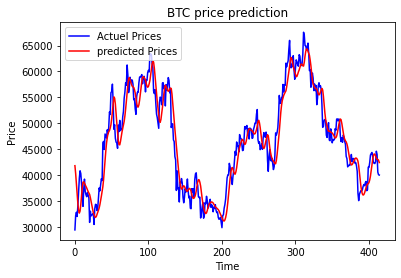

In [29]:
plt.plot(actuel_prices,color="blue", label="Actuel Prices")
plt.plot(prediction_prices,color="red", label="predicted Prices")
plt.title(f"{Crypto_currency} price prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()

Lets predict the next day

In [30]:

real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data= np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

In [31]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

[[41782.53]]


We predicted the price of the BTC in the next day wich is 44799.152 USD 

**now we will try to predict the price in a futur date**

In [32]:
prediction_days = 60
futur_day = 30
x_train,y_train = [], []
for x in range(prediction_days, len(scaled_data)-futur_day):
  x_train.append(scaled_data[x - prediction_days : x,0])
  y_train.append(scaled_data[x+futur_day,0])

x_train,y_train = np.array(x_train) , np.array(y_train)
x_train = np.reshape(x_train , (x_train.shape[0], x_train.shape[1], 1))

From here all the steps are the same

In [33]:
model = Sequential()
model.add(LSTM(units=50, return_sequences= True , input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [34]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train, y_train , epochs=25 , batch_size=32)

Epoch 1/25
68/68 [==============================] - 8s 42ms/step - loss: 0.0148
Epoch 2/25
68/68 [==============================] - 3s 42ms/step - loss: 0.0078
Epoch 3/25
68/68 [==============================] - 3s 43ms/step - loss: 0.0077
Epoch 4/25
68/68 [==============================] - 3s 43ms/step - loss: 0.0067
Epoch 5/25
68/68 [==============================] - 3s 43ms/step - loss: 0.0065
Epoch 6/25
68/68 [==============================] - 3s 42ms/step - loss: 0.0058
Epoch 7/25
68/68 [==============================] - 3s 42ms/step - loss: 0.0049
Epoch 8/25
68/68 [==============================] - 3s 42ms/step - loss: 0.0040
Epoch 9/25
68/68 [==============================] - 3s 42ms/step - loss: 0.0045
Epoch 10/25
68/68 [==============================] - 3s 43ms/step - loss: 0.0041
Epoch 11/25
68/68 [==============================] - 3s 43ms/step - loss: 0.0040
Epoch 12/25
68/68 [==============================] - 3s 42ms/step - loss: 0.0044
Epoch 13/25
68/68 [==================

In [35]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

BTC_USD = yf.Ticker(f"{Crypto_currency}-{Real_currency}")
test_data = BTC_USD.history(start=test_start, end=test_end)
actuel_prices= test_data["Close"].values

total_dataset= pd.concat((Data["Close"], test_data["Close"] ), axis=0)

In [36]:
model_inputs= total_dataset[len(total_dataset)-len(test_data)- prediction_days:].values
model_inputs= model_inputs.reshape(-1,1)
model_inputs= scaler.fit_transform(model_inputs)


In [37]:
x_test= []
for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days : x, 0])
x_test= np.array(x_test)
x_train= np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [38]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

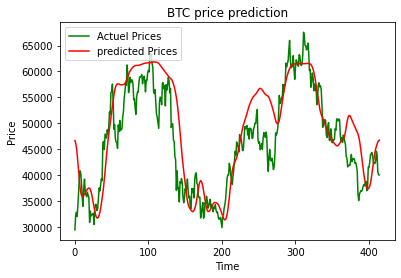

In [39]:
plt.plot(actuel_prices,color="green", label="Actuel Prices")
plt.plot(prediction_prices,color="red", label="predicted Prices")
plt.title(f"{Crypto_currency} price prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()

Now we neeed to calculate the RSI wich is an indicator (Relative Strength Index) is an indicator that we can use to measure if given asset is priced to high or too low

In [ ]:
print(prediction_prices)

In [41]:
df= total_dataset.reset_index()
print(df)

           Date         Close
0    2016-01-01    434.334015
1    2016-01-02    433.437988
2    2016-01-03    430.010986
3    2016-01-04    433.091003
4    2016-01-05    431.959991
...         ...           ...
2652 2022-02-15  44575.203125
2653 2022-02-16  43961.859375
2654 2022-02-17  40538.011719
2655 2022-02-18  40030.976562
2656 2022-02-19  39977.078125

[2657 rows x 2 columns]


In [43]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]

    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [44]:
df['RSI'] = computeRSI(df['Close'], 14)

In [45]:
print(df.head())
print(df.tail())

        Date       Close  RSI
0 2016-01-01  434.334015  NaN
1 2016-01-02  433.437988  NaN
2 2016-01-03  430.010986  NaN
3 2016-01-04  433.091003  NaN
4 2016-01-05  431.959991  NaN
           Date         Close        RSI
2652 2022-02-15  44575.203125  63.067564
2653 2022-02-16  43961.859375  59.724189
2654 2022-02-17  40538.011719  45.290400
2655 2022-02-18  40030.976562  43.609584
2656 2022-02-19  39977.078125  43.425092


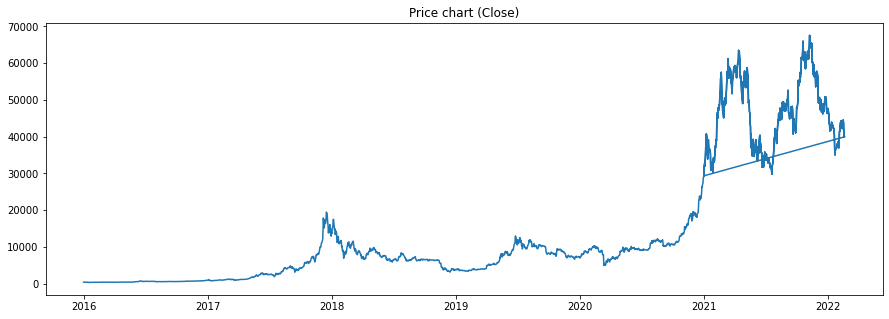

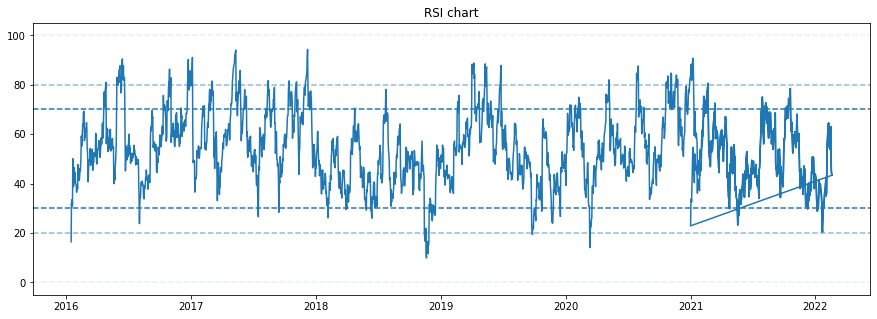

In [46]:
# plot price
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Close'])
plt.title('Price chart (Close)')
plt.show()


# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('RSI chart')
plt.plot(df['Date'], df['RSI'])

plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.show()

When RSI values are:

above 70, asset is considered overbought (overvalued)
below 30, asset is considered oversold (undervalued)
Even better is to look at divergence between price and RSI values:

bullish divergence: price is trending down, RSI values are increasing (possible Long entry)
bearish divergence: price is th=rending up, RSI values are decreasing (possible Short entry)
Interesting might also be to look at datapoints around 20 and 80 RSI. Or even to investigate price correlation to RSI on weekly chart. Weekly timeframes should remove the noise, hence weekly RSI value around 20 or 30 might be theoretically actionable buy signal, especially with bullish divergence.